# Logistic Regression - Coursera

This notebook will go about the second week of the coursera Machine Learning class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Week 2 - Logistic Regression

"In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision."

### Visualizing the data

In [128]:
data = np.loadtxt('data/coursera/ex2data1.txt', delimiter=',')

In [211]:
X = data[:, [0, 1]]
y = data[:, 2]

### Plot the data

In [4]:
positive = np.nonzero(y==1)
negative = np.nonzero(y!=1)

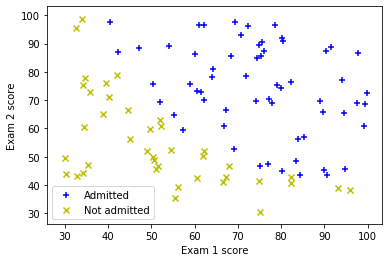

In [5]:
plt.scatter(X[positive, 0], X[positive, 1], marker='+', color='b', label='Admitted')
plt.scatter(X[negative, 0], X[negative, 1], marker='x', color='y', label='Not admitted')
plt.legend()
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.show()

### Sigmoid function

The logistic function that we are going to use has its **hypothesis** defined as :

\begin{equation*}
h_\theta(x) = g(\theta^Tx)
\end{equation*}

where $g$ is the sigmoid function. It is defined as :

\begin{equation*}
g(z) = \frac{1}{1+e^{-z}}
\end{equation*}

In [53]:
def sigmoid(z):
    if type(z) is np.ndarray:
        nb_rows = z.shape[0]
        nb_columns = z.shape[1]
        g = z.copy()
        for i in range(nb_rows):
            for j in range(nb_columns):
                g[(i, j)] = 1 / (1 + math.exp(-g[i, j]))
        return g
    else:
        return 1 / (1 + math.exp(-z))

In [56]:
sigmoid(0)

0.5

### Cost function and gradient

Now we will see how to implement the cost function for the Logistic Regression.  
The cost function looks like the following : 
\begin{equation*}
J(\theta) = \frac{1}{m} \sum_{i=1}^m[-y^ilog(h_\theta(x^i)) - (1 - y^i) log (1 - h_\theta(x^i))]
\end{equation*}

And the gradient function is as follows : 
\begin{equation*}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^i) - y^i)x^i_j
\end{equation*}

In [242]:
def cost_function(X, y, theta):
    """
    Returns both the cost J and the gradient value
    """
    m = len(y)
    
    h_theta_x = sigmoid(X @ theta)
    
    y_is_one = np.dot(-y, np.log(h_theta_x))
    y_is_zero = np.dot((1 - y), np.log(1 - h_theta_x))
    
    J = (1 / m) * (y_is_one - y_is_zero).sum()

    gradient = (1 / m) * np.sum(np.dot(h_theta_x - y, X), axis=0)
    return J, gradient

In [212]:
m = X.shape[0]
n = X.shape[1]

# Add the intercept term to X
ones = np.ones((len(y), 1))
X = np.concatenate((ones, X), axis=1)

In [243]:
# Initialize the fitting parameters
initial_theta = np.zeros((n+1, 1))

In [244]:
cost, gradient = cost_function(X, y, initial_theta)

In [245]:
cost

0.6931471805599452

In [246]:
gradient

array([  -10.        , -1200.92165893, -1126.28422055])